# Geolocation Data Exercise -- Larry Larkin


In [1]:
import pandas as pd
import geopandas as gpd #used for transforming geolocation data
import matplotlib.pyplot as plt

from datetime import datetime  #to convert data to datetime that does not fall within the pandas.to_datetime function timeframe
from shapely.geometry import Point  #transform latitude/longitude to geo-coordinate data
from geopandas.tools import geocode #get the latitude/longitude for a given address
from geopandas.tools import reverse_geocode  #get the address for a location using latitude/longitude

%matplotlib inline

In [2]:
# Load huricane path dataset
path_df = pd.read_csv("Datasets/hurricaneMichael.csv")
path_df.head()

,AdvisoryNumber,Date,Lat,Long,Wind,Pres,Movement,Type,Name,Received,Forecaster
0,1,10/06/2018 17:00,18.0,86.6,30,1006,NW at 6 MPH (325 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 16:50,Beven
1,1A,10/06/2018 20:00,18.3,86.6,30,1004,N at 6 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 19:32,Avila
2,2,10/06/2018 23:00,18.8,86.6,30,1004,N at 7 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 22:38,Avila
3,2A,10/07/2018 02:00,18.4,87.1,35,1004,NW at 5 MPH (320 deg),Potential Tropical Cyclone,Fourteen,10/07/2018 01:38,Berg
4,3,10/07/2018 05:00,18.6,86.9,35,1004,NNW at 3 MPH (340 deg),Tropical Depression,FOURTEEN,10/07/2018 04:53,Berg


In [3]:
#data type of each column
path_df.dtypes

AdvisoryNumber     object
Date               object
Lat               float64
Long              float64
Wind                int64
Pres                int64
Movement           object
Type               object
Name               object
Received           object
Forecaster         object
dtype: object

In [4]:
# Convert longitude to negative values
path_df['Long'] = 0 - path_df['Long']

In [5]:
path_df.head()

,AdvisoryNumber,Date,Lat,Long,Wind,Pres,Movement,Type,Name,Received,Forecaster
0,1,10/06/2018 17:00,18.0,-86.6,30,1006,NW at 6 MPH (325 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 16:50,Beven
1,1A,10/06/2018 20:00,18.3,-86.6,30,1004,N at 6 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 19:32,Avila
2,2,10/06/2018 23:00,18.8,-86.6,30,1004,N at 7 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 22:38,Avila
3,2A,10/07/2018 02:00,18.4,-87.1,35,1004,NW at 5 MPH (320 deg),Potential Tropical Cyclone,Fourteen,10/07/2018 01:38,Berg
4,3,10/07/2018 05:00,18.6,-86.9,35,1004,NNW at 3 MPH (340 deg),Tropical Depression,FOURTEEN,10/07/2018 04:53,Berg


In [6]:
path_df.count()

AdvisoryNumber    45
Date              45
Lat               45
Long              45
Wind              45
Pres              45
Movement          45
Type              45
Name              45
Received          45
Forecaster        45
dtype: int64

In [7]:
# Generate dataframe with non-null latitude and longitude column values only
path_df = path_df.loc[path_df['Lat'].notnull() & path_df['Long'].notnull()]

In [8]:
path_df.count()

AdvisoryNumber    45
Date              45
Lat               45
Long              45
Wind              45
Pres              45
Movement          45
Type              45
Name              45
Received          45
Forecaster        45
dtype: int64

In [9]:
# Change Date column into a string
# Need to use string type for getYear function below
path_df['Date'] = path_df['Date'].astype(str)

In [10]:
# Function to split apart the date from the timestamp
def getYear(col):
    # Get MM/DD/YYYY value
    date = col.split(" ")[0] # Date and time separated by a space character
    
    # Extract year from date
    dt = datetime.strptime(date, '%m/%d/%Y')
    return dt.year

In [11]:
# Replace the year timestamp data with only the year (using the getYear function)
path_df['Date'] = path_df['Date'].apply(getYear)
path_df.head()

,AdvisoryNumber,Date,Lat,Long,Wind,Pres,Movement,Type,Name,Received,Forecaster
0,1,2018,18.0,-86.6,30,1006,NW at 6 MPH (325 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 16:50,Beven
1,1A,2018,18.3,-86.6,30,1004,N at 6 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 19:32,Avila
2,2,2018,18.8,-86.6,30,1004,N at 7 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 22:38,Avila
3,2A,2018,18.4,-87.1,35,1004,NW at 5 MPH (320 deg),Potential Tropical Cyclone,Fourteen,10/07/2018 01:38,Berg
4,3,2018,18.6,-86.9,35,1004,NNW at 3 MPH (340 deg),Tropical Depression,FOURTEEN,10/07/2018 04:53,Berg


In [12]:
# Doublecheck absence of columns with null values
path_df.count()

AdvisoryNumber    45
Date              45
Lat               45
Long              45
Wind              45
Pres              45
Movement          45
Type              45
Name              45
Received          45
Forecaster        45
dtype: int64

In [13]:
# Make a new column to hold the longitude & latitude as a list
path_df['Coordinates'] = list(path_df[['Long', 'Lat']].values)

In [14]:
#see new coordinates column
path_df.head()

,AdvisoryNumber,Date,Lat,Long,Wind,Pres,Movement,Type,Name,Received,Forecaster,Coordinates
0,1,2018,18.0,-86.6,30,1006,NW at 6 MPH (325 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 16:50,Beven,"[-86.6, 18.0]"
1,1A,2018,18.3,-86.6,30,1004,N at 6 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 19:32,Avila,"[-86.6, 18.3]"
2,2,2018,18.8,-86.6,30,1004,N at 7 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 22:38,Avila,"[-86.6, 18.8]"
3,2A,2018,18.4,-87.1,35,1004,NW at 5 MPH (320 deg),Potential Tropical Cyclone,Fourteen,10/07/2018 01:38,Berg,"[-87.1, 18.4]"
4,3,2018,18.6,-86.9,35,1004,NNW at 3 MPH (340 deg),Tropical Depression,FOURTEEN,10/07/2018 04:53,Berg,"[-86.9, 18.6]"


In [15]:
# List values in coordinates column are classified as object type
path_df['Coordinates'].dtypes

dtype('O')

In [16]:
# Convert the coordinates to a geolocation type
path_df['Coordinates'] = path_df['Coordinates'].apply(Point)

In [17]:
# Coordinates column now has POINT next to each coordinate pair value
path_df.head()

,AdvisoryNumber,Date,Lat,Long,Wind,Pres,Movement,Type,Name,Received,Forecaster,Coordinates
0,1,2018,18.0,-86.6,30,1006,NW at 6 MPH (325 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 16:50,Beven,POINT (-86.59999999999999 18)
1,1A,2018,18.3,-86.6,30,1004,N at 6 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 19:32,Avila,POINT (-86.59999999999999 18.3)
2,2,2018,18.8,-86.6,30,1004,N at 7 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 22:38,Avila,POINT (-86.59999999999999 18.8)
3,2A,2018,18.4,-87.1,35,1004,NW at 5 MPH (320 deg),Potential Tropical Cyclone,Fourteen,10/07/2018 01:38,Berg,POINT (-87.09999999999999 18.4)
4,3,2018,18.6,-86.9,35,1004,NNW at 3 MPH (340 deg),Tropical Depression,FOURTEEN,10/07/2018 04:53,Berg,POINT (-86.90000000000001 18.6)


In [18]:
# Coordinates column with geolocation data is just a regular pandas Series type
type(path_df['Coordinates'])

pandas.core.series.Series

In [19]:
#create a geolocation dataframe type using the coordinates column as the geolocation data
geo_path = gpd.GeoDataFrame(path_df, geometry='Coordinates')

In [20]:
#geo-dataframe looks the same as regular dataframe
geo_path.head()

,AdvisoryNumber,Date,Lat,Long,Wind,Pres,Movement,Type,Name,Received,Forecaster,Coordinates
0,1,2018,18.0,-86.6,30,1006,NW at 6 MPH (325 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 16:50,Beven,POINT (-86.59999999999999 18)
1,1A,2018,18.3,-86.6,30,1004,N at 6 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 19:32,Avila,POINT (-86.59999999999999 18.3)
2,2,2018,18.8,-86.6,30,1004,N at 7 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 22:38,Avila,POINT (-86.59999999999999 18.8)
3,2A,2018,18.4,-87.1,35,1004,NW at 5 MPH (320 deg),Potential Tropical Cyclone,Fourteen,10/07/2018 01:38,Berg,POINT (-87.09999999999999 18.4)
4,3,2018,18.6,-86.9,35,1004,NNW at 3 MPH (340 deg),Tropical Depression,FOURTEEN,10/07/2018 04:53,Berg,POINT (-86.90000000000001 18.6)


In [21]:
# Verify coordinates column is geolocation data type
type(geo_path['Coordinates'])

geopandas.geoseries.GeoSeries

In [22]:
#import file that contains a world map shape polygons
#will use to plot the coordinates of meteorite landings
filepath = "Datasets/US_states(5m).json"

# Data contains polygon shape coordinates for different map body types (continents, etc.)
map_df = gpd.read_file(filepath)
map_df.head()

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry
0,0400000US01,01,Alabama,,50645.326,"(POLYGON ((-88.124658 30.28364, -88.0868119999..."
1,0400000US02,02,Alaska,,570640.950,"(POLYGON ((-166.10574 53.988606, -166.075283 5..."
2,0400000US04,04,Arizona,,113594.084,"POLYGON ((-112.538593 37.000674, -112.534545 3..."
3,0400000US05,05,Arkansas,,52035.477,"POLYGON ((-94.042964 33.019219, -94.043036 33...."
4,0400000US06,06,California,,155779.220,"(POLYGON ((-122.421439 37.869969, -122.421341 ..."


In [23]:
# Include only 48 contiguous states since the hurricane did not pass through them
map48 = map_df.loc[map_df['NAME'].isin(['Alaska', 'Hawaii', 'Puerto Rico']) == False]

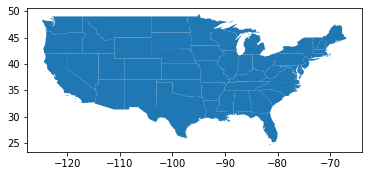

In [24]:
# Map graph
map48.plot()

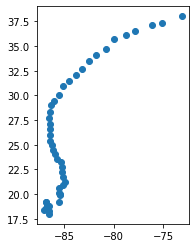

In [25]:
# Plot the coordinates (no map)
geo_path.plot()

Text(0.5, 1, 'Hurricane Michael Path')

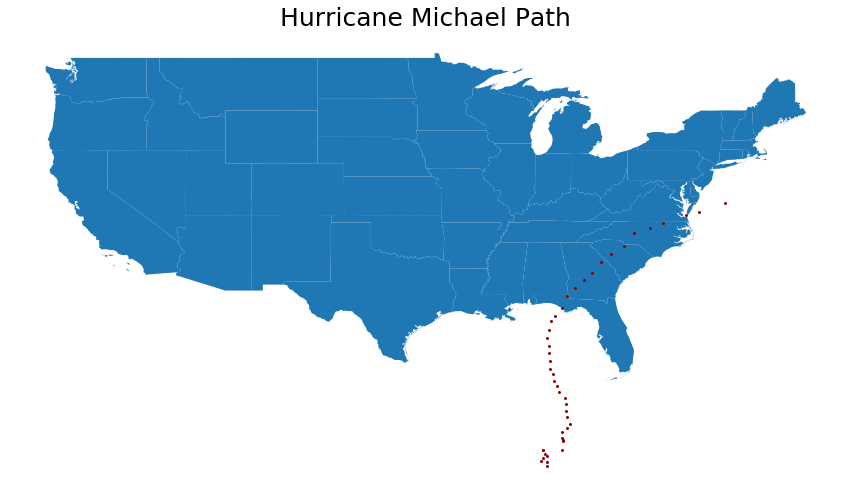

In [26]:
# Plot coordinates on top of map graph

# This is to set the size of the borders
fig, ax = plt.subplots(1, figsize=(15,10))

# This is the US map
basemap = map48.plot(ax=ax)

# Plot coordinates on top of map graph
geo_path.plot(ax=basemap, color='darkred', marker=".", markersize=15)

# Take off axis numbers
ax.axis('off')

#put title on map
ax.set_title("Hurricane Michael Path", fontsize=25, fontweight=3)